# Welcome to Deep Learning - Part II 

Some of the most impressive advances in artificial intelligence in recent years have been in the field of *deep learning*. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

So what is deep learning? **Deep learning** is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Through their power and scalability **neural networks** have become the defining model of deep learning.  Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes instead from the complexity of the connections these neurons can form.



# 0. RECAP




## The Linear Unit 

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with one input looks like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mfOlDR6.png" width="250" alt="Diagram of a linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>The Linear Unit: y = w x + b
</center></figcaption>
</figure>



## Multiple Inputs 

We can add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/vyXSnlZ.png" width="300" alt="Three input connections: x0, x1, and x2, along with the bias.">
<figcaption style="textalign: center; font-style: italic"><center>A linear unit with three inputs.
</center></figcaption>
</figure>

The formula for this neuron would be $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.


## Layers

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="A stack of three circles in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer of two linear units receiving two inputs and a bias.
</center></figcaption>
</figure>



## The Activation Function 

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something *nonlinear*. What we need are activation functions.


An **activation function** is simply some function we apply to each of a layer's outputs (its *activations*). The most common is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="A graph of the rectifier function. The line y=x when x>0 and y=0 when x<0, making a 'hinge' shape like '_/'.">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a *bend* in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".)  Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`, which we might draw in a diagram like:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of a '+' symbol we now have a hinge '_/'. ">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

## Stacking Dense Layers

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A stack of dense layers makes a "fully-connected" network.
</center></figcaption>
</figure>

The layers before the output layer are sometimes called **hidden** since we never see their outputs directly.

Now, notice that the final (output) layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.


## Building Sequential Models 

The `Sequential` model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:
```
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])
```

## Alternatives to ReLU

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.


## The Loss Function

The **loss function** measures the disparity between the the target's true value and the value the model predicts. 

A common loss function for regression problems is the **mean absolute error** or **MAE**. For each prediction `y_pred`, MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

The total MAE loss on a dataset is the mean of all these absolute differences.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/VDcvkZN.png" width="500" alt="A graph depicting error bars from data points to the fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>The mean absolute error is the average length between the fitted curve and the data points.
</center></figcaption>
</figure>

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras). The Huber loss is less sensitive to outliers in data than the squared error loss.

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

## The Optimizer - Stochastic Gradient Descent

The **optimizer** is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent**. They are iterative algorithms that train a network in steps. One **step** of training goes like this:
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rFI1tIk.gif" width="1600" alt="Fitting a line batch by batch. The loss decreases and the weights approach their true values.">
<figcaption style="textalign: center; font-style: italic"><center>Training a neural network with Stochastic Gradient Descent.
</center></figcaption>
</figure>

Each iteration's sample of training data is called a **minibatch** (or often just "batch"), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.


## Learning Rate and Batch Size

Notice that the line in the animation only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

**Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

## Adding the Loss and Optimizer

After defining a model, you can add a loss function and optimizer with the model's `compile` method:
```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

# Example - Big Mart Sales Prediction

We've rescaled each feature with sklean's `StandardScaler`. As we'll see today, neural networks tend to perform best when their inputs are on a common scale.

## Setting Up the Workspace

In [1]:
import pandas as pd
import numpy as np
import sklearn
sklearn.__version__

'1.2.2'

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import set_config

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import display

# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

<ipython-input-2-8f154f658bfe>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Loading the Data

The *Big Mart Sales Prediction* dataset consists of sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a model to predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Since we already explored the Big Mart data extensively before Study Trek and Spring Break, we simply run the next cell to display the first few rows of the columns of data that we want to use.

In [3]:
#import pandas as pd
df_sales = pd.read_csv('https://www.dropbox.com/s/yqaymhdf7bvvair/bigmart_sales_predictions.csv?dl=1')

#Keep only columns that we use as features
df_sales = df_sales[['Item_Visibility','Item_MRP','Item_Weight','Item_Outlet_Sales']]
df_sales.head(5)

,Item_Visibility,Item_MRP,Item_Weight,Item_Outlet_Sales
0,0.016047,249.8092,9.30,3735.1380
1,0.019278,48.2692,5.92,443.4228
2,0.016760,141.6180,17.50,2097.2700
3,0.000000,182.0950,19.20,732.3800
4,0.000000,53.8614,8.93,994.7052


In [4]:
df_sales.shape # (rows, columns)

(8523, 4)

In [5]:
# Define target and features
target = "Item_Outlet_Sales"
y = df_sales[target].copy()
X = df_sales.drop(columns=[target]).copy()

# Create training and validation splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
display(X_train.head())

#Establish a pipeline for numerical features
num_features = ['Item_Weight','Item_Visibility','Item_MRP']
num_pipe = Pipeline(steps=[
    ('simpleimputer', SimpleImputer()),
    ('standardscaler', StandardScaler())])

#Create switch to correctly route each column to the correct pipeline
preprocessor = make_column_transformer(
    (num_pipe, num_features), verbose_feature_names_out=False)
display(preprocessor)

#Fit each step in our pipeline to the training data
preprocessor.fit(X_train)

#Now we can transform our features, with the steps specified in the pipeline
Xprocessed_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
Xprocessed_test_df = pd.DataFrame(preprocessor.transform(X_test),
                                  columns=preprocessor.get_feature_names_out(),
                                  index=X_test.index)
display(Xprocessed_train_df.head())

# make back-up copy of original train target and validation target
y_train_orig = y_train 
y_test_orig = y_test 

#Log transform target instead of standardizing
y_train = np.log(y_train)
y_test = np.log(y_test)

,Item_Visibility,Item_MRP,Item_Weight
7477,0.120256,39.2506,8.365
5089,0.015944,231.9668,13.650
6992,0.000000,89.8856,14.300
6264,0.041803,34.8216,12.350
4374,0.031963,178.0344,6.380


ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility',
                                  'Item_MRP'])],
                  verbose_feature_names_out=False)

,Item_Weight,Item_Visibility,Item_MRP
7477,-1.065209,1.058290,-1.629769
5089,0.184914,-0.971558,1.461938
6992,0.338666,-1.281811,-0.817442
6264,-0.122590,-0.468364,-1.700823
4374,-1.534745,-0.659836,0.596711


How many inputs should this network have? We can discover this by looking at the number of columns in the data matrix. Be sure not to include the target (`'Item_Outlet_Sales'`) here -- only the input features.

In [6]:
print(Xprocessed_train_df.shape)

(6392, 3)


In [7]:
input_shape = [Xprocessed_train_df.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [3]


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xprocessed_train_df[['Item_MRP']], y_train)
model.coef_

array([0.52011878])

In [9]:
model.intercept_

7.298927200339228

Three columns means three inputs.

We've chosen a three-layer network with 320 neurons. This network should be capable of learning fairly complex relationships in the data.

In [10]:
#from tensorflow import keras
#from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.

In [11]:
model.compile(
    optimizer='adam',
    loss='mae',
)

Now we're ready to start the training! We've told Keras to feed the optimizer 128 rows of the training data at a time (the `batch_size`) and to do that 200 times all the way through the dataset (the `epochs`).

In [12]:
history = model.fit(
    Xprocessed_train_df, y_train,
    batch_size=128,
    epochs=200,
    verbose=0, #suppress output since we'll plot the curves
)

You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The `fit` method in fact keeps a record of the loss produced during training in a `History` object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

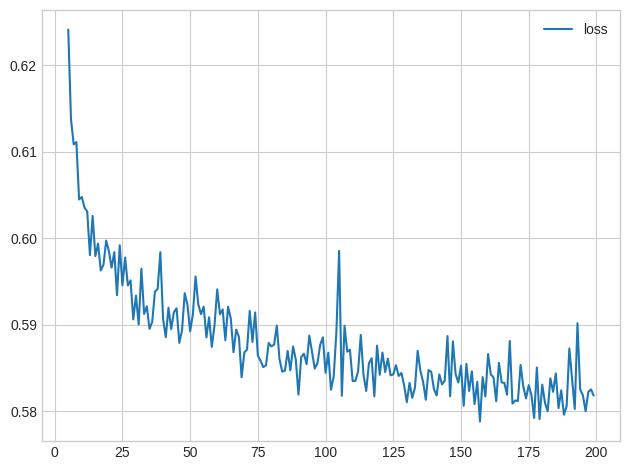

In [13]:
#import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
# start the plot at epoch 5 (you can change this to get a different view)
history_df.loc[5:,['loss']].plot();

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal, it means the model has learned all it can and there would be no reason continue for additional epochs.

---
# 1. Underfitting and Overfitting

Recall from the example in the previous lesson that Keras will keep a history of the training and validation loss over the epochs that it is training the model. In this lesson, we're going to learn how to interpret these learning curves and how we can use them to guide model development. In particular, we'll examine at the learning curves for evidence of *underfitting* and *overfitting* and look at a couple of strategies for correcting it.

## Interpreting the Learning Curves

You might think about the information in the training data as being of two kinds: *signal* and *noise*. The signal is the part that generalizes, the part that can help our model make predictions from new data. The noise is that part that is *only* true of the training data; the noise is all of the random fluctuation that comes from data in the real-world or all of the incidental, non-informative patterns that can't actually help the model make predictions. The noise is the part might look useful but really isn't.

We train a model by choosing weights or parameters that minimize the loss on a training set. You might know, however, that to accurately assess a model's performance, we need to evaluate it on a new set of data, the *validation* data. (You could see our lesson on [model validation](https://www.kaggle.com/dansbecker/model-validation) in *Introduction to Machine Learning* for a review.)

When we train a model we've been plotting the loss on the training set epoch by epoch. To this we'll add a plot the validation data too. These plots we call the **learning curves**. To train deep learning models effectively, we need to be able to interpret them.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/tHiVFnM.png" width="500" alt="A graph of training and validation loss.">
<figcaption style="textalign: center; font-style: italic"><center>The validation loss gives an estimate of the expected error on unseen data.
</center></figcaption>
</figure>

# to underfit - reduce layers. 
more complex behavior add more layers (heght)
more linear behaviron add more dense

Now, the training loss will go down either when the model learns signal or when it learns noise. But the validation loss will go down only when the model learns signal. (Whatever noise the model learned from the training set won't generalize to new data.) So, when a model learns signal both curves go down, but when it learns noise a *gap* is created in the curves. The size of the gap tells you how much noise the model has learned.

Ideally, we would create models that learn all of the signal and none of the noise. This will practically never happen. Instead we make a trade. We can get the model to learn more signal at the cost of learning more noise. So long as the trade is in our favor, the validation loss will continue to decrease. After a certain point, however, the trade can turn against us, the cost exceeds the benefit, and the validation loss begins to rise.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eUF6mfo.png" width="600" alt="Two graphs. On the left, a line through a few data points with the true fit a parabola. On the right, a curve running through each datapoint with the true fit a parabola.">
<figcaption style="textalign: center; font-style: italic"><center>Underfitting and overfitting.
</center></figcaption>
</figure>

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. **Underfitting** the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*. **Overfitting** the training set is when the loss is not as low as it could be because the model learned too much *noise*. The trick to training deep learning models is finding the best balance between the two.

We'll look at a couple ways of getting more signal out of the training data while reducing the amount of noise.

## Capacity

A model's **capacity** refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity.

You can increase the capacity of a network either by making it *wider* (more units to existing layers) or by making it *deeper* (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.


In [14]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

You'll explore how the capacity of a network can affect its performance in the Lab.

## Early Stopping

We mentioned that when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called **early stopping**.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eP0gppr.png" width=500 alt="A graph of the learning curves with early stopping at the minimum validation loss, underfitting to the left of it and overfitting to the right.">
<figcaption style="textalign: center; font-style: italic"><center>We keep the model where the validation loss is at a minimum.
</center></figcaption>
</figure>

Once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimum occured. This ensures that the model won't continue to learn noise and overfit the data.

Training with early stopping also means we're in less danger of stopping the training too early, before the network has finished learning signal. So besides preventing overfitting from training too long, early stopping can also prevent *underfitting* from not training long enough. Just set your training epochs to some large number (more than you'll need), and early stopping will take care of the rest.

## Adding Early Stopping

In Keras, we include early stopping in our training through a callback. A **callback** is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. (Keras has [a variety of useful callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) pre-defined, but you can [define your own](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback), too.)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

These parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found." It can sometimes be hard to tell if the validation loss is rising due to overfitting or just due to random batch variation. The parameters allow us to set some allowances around when to stop.

As we'll see in our example, we'll pass this callback to the `fit` method along with the loss and optimizer.



## Example - Train a Model with Early Stopping

Let's continue developing the model from the example in the last tutorial. We'll increase the capacity of that network but also add an early-stopping callback to prevent overfitting.

Here's the data prep again.

Now let's increase the capacity of the network. We'll go for a fairly large network, but rely on the callback to halt the training once the validation loss shows signs of increasing.

In [16]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

After defining the callback, add it as an argument in `fit` (you can have several, so put it in a list). Choose a large number of epochs when using early stopping, more than you'll need.

Minimum validation loss: 0.6063138842582703


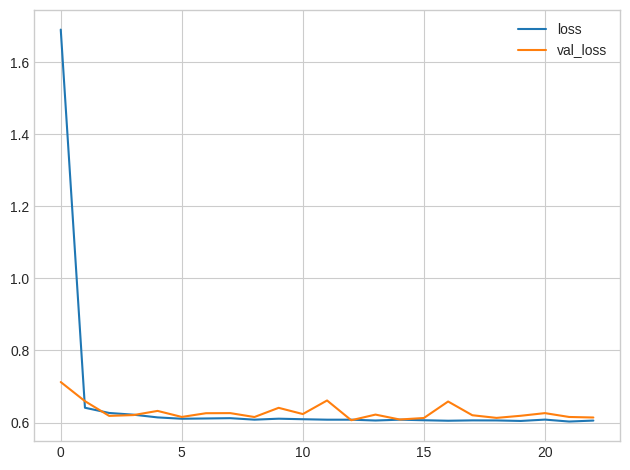

In [17]:
history = model.fit(
    Xprocessed_train_df, y_train,
    validation_data=(Xprocessed_test_df, y_test),
    batch_size=16,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0, # suppress output since we'll plot the curves
)


history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

And sure enough, Keras stopped the training well before the full 200 epochs!

### In Lab: *Correct for Underfitting and Overfitting*

1.   Evaluate Baseline
2.   Add Capacity
3.   Define Early Stopping Callback
4.   Train and Interpret



---
# 2. Dropout and Batch Normalization

There's more to the world of deep learning than just dense layers. There are dozens of kinds of layers you might add to a model. (Try browsing through the [Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/) for a sample!) Some are like dense layers and define connections between neurons, and others can do preprocessing or transformations of other sorts.

In this lesson, we'll learn about a two kinds of special layers, not containing any neurons themselves, but that add some functionality that can sometimes benefit a model in various ways. Both are commonly used in modern architectures.

## Dropout

The first of these is the "dropout layer", which can help correct overfitting.

In the last lesson we talked about how overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.

This is the idea behind **dropout**. To break up these conspiracies, we randomly *drop out* some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/a86utxY.gif" width="600" alt="An animation of a network cycling through various random dropout configurations.">
<figcaption style="textalign: center; font-style: italic"><center>Here, 50% dropout has been added between the two hidden layers.</center></figcaption>
</figure>

You could also think about dropout as creating a kind of *ensemble* of networks. The predictions will no longer be made by one big network, but instead by a committee of smaller networks. Individuals in the committee tend to make different kinds of mistakes, but be right at the same time, making the committee as a whole better than any individual. (Remember random forests as an ensemble of decision trees? It's the same idea.)



## Adding Dropout

In Keras, the dropout rate argument `rate` defines what percentage of the input units to shut off. Put the `Dropout` layer just before the layer you want the dropout applied to:

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

## Batch Normalization

The next special layer we'll look at performs "batch normalization" (or "batchnorm"), which can help correct training that is slow or unstable.

With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) or [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.

Now, if it's good to normalize the data before it goes into the network, maybe also normalizing inside the network would be better! In fact, we have a special kind of layer that can do this, the **batch normalization layer**. A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

Most often, batchnorm is added as an aid to the optimization process (though it can sometimes also help prediction performance). Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck". Consider adding batch normalization to your models, especially if you're having trouble during training.

## Adding Batch Normalization ##

Batch normalization can be used at almost any point in a network. You can put it after a layer...

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... or between a layer and its activation function:

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

And if you add it as the first layer of your network it can act as a kind of adaptive preprocessor, standing in for something like Sci-Kit Learn's `StandardScaler`.

## Example - Dropout and Batch Normalization

Let's continue developing the *Big Mart Sales Prediction* model. Now we'll increase the capacity even more, but add dropout to control overfitting and batch normalization to speed up optimization. This time, we'll also leave off standardizing the data, to demonstrate how batch normalization can stabilize the training.

In [18]:

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


<ipython-input-18-24bab3894988>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [19]:
# Define target and features

df_sales = pd.read_csv('https://www.dropbox.com/s/yqaymhdf7bvvair/bigmart_sales_predictions.csv?dl=1')
#Normalize ItemFatContent
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(
    {'Low Fat': 0,
     'LF': 0,
     'low fat': 0,
     'Regular': 1,
     'reg': 1})

target = "Item_Outlet_Sales"
y = df_sales[target].copy()
X = df_sales.drop(columns=[target]).copy()

# Create training and validation splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


#Establish each pipeline for different feature types
categorical_features = ['Item_Type','Outlet_Location_Type','Outlet_Type']
cat_pipe = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

categorical_ordinal_features = ['Outlet_Size']
cat_ord_pipe = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehotencoder', OrdinalEncoder(handle_unknown='error',
                                     categories=[['Missing','Small','Medium','High']]))])

#REMOVED SCALER BELOW!
num_features = ['Item_Weight','Item_Fat_Content','Item_MRP']
num_pipe = Pipeline(steps=[
    ('simpleimputer', SimpleImputer())])

#Create rail switch to correctly route each column to the correct pipel
preprocessor = make_column_transformer(
    (cat_pipe, categorical_features),
    (cat_ord_pipe, categorical_ordinal_features),
    (num_pipe, num_features), verbose_feature_names_out=False)
preprocessor

#We first need to fit each step in our pipeline to the training data.
preprocessor.fit(X_train)
#Now we can transform our data, with the steps specified in the pipeline
Xprocessed_train_unscaled_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
Xprocessed_test_unscaled_df = pd.DataFrame(preprocessor.transform(X_test),
                                  columns=preprocessor.get_feature_names_out(),
                                  index=X_test.index)
display(Xprocessed_train_unscaled_df)

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Weight,Item_Fat_Content,Item_MRP
7477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,8.36500,0.0,39.2506
5089,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.65000,0.0,231.9668
6992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,14.30000,1.0,89.8856
6264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,12.35000,0.0,34.8216
4374,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.38000,0.0,178.0344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,18.60000,0.0,160.6236
7763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12.86826,0.0,36.0190
5218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,3.0,5.92000,1.0,50.3692
1346,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,15.60000,0.0,111.8544


When adding dropout, you may need to increase the number of units in your `Dense` layers.

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[Xprocessed_train_unscaled_df.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

There's nothing to change this time in how we set up the training.

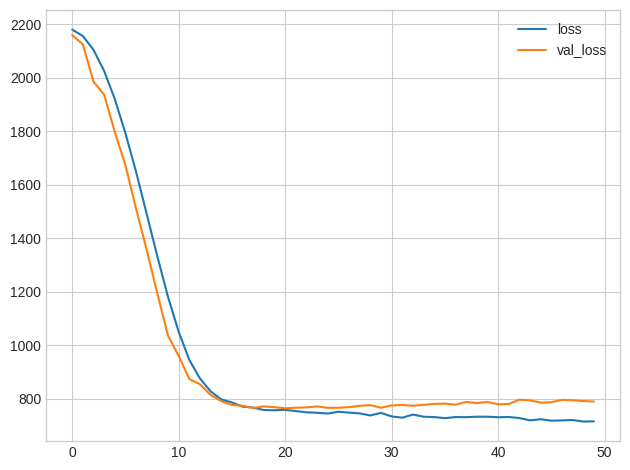

In [21]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    Xprocessed_train_unscaled_df, y_train_orig,
    validation_data=(Xprocessed_test_unscaled_df, y_test_orig),
    batch_size=64,
    epochs=50,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

You'll typically get better performance if you standardize your data before using it for training. That we were able to use the raw data at all, however, shows how effective batch normalization can be on more difficult datasets.

### In Lab: *Experiment with two kinds of special layers*

1.   Add Dropout to our last model
2.   Evaluate Dropout
3.   Explore Effect of Normalization
4.   Add Batch Normalization Layers
5.   Evaluate Batch Normalization

---
# 3. Binary Classification

So far in SCM.256 we've learned about how neural networks can solve regression problems. Now we're going to apply neural networks to another common machine learning problem: classification. 

Classification into one of two or more classes is a common machine learning problem. In January during SCM.254 we studied the example of classification of cargo incidents with an incident handling dataset from a global freight forwarder using logistic regression.

Most everything we've learned up until now in SCM.256 regarding Deep Learning for regression problems still applies for classification problems. The main difference is in the *loss function* we use and in what kind of *outputs* we want the final layer to produce.

In your raw data, the classes might be represented by strings. Before using this data we'll assign a **class label** using integers. In a binary classification problem, one class will be `0` and the other will be `1`. Assigning numeric labels puts the data in a form a neural network can use.

## Accuracy and Cross-Entropy

**Accuracy** is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: `accuracy = number_correct / total`. A model that always predicted correctly would have an accuracy score of `1.0`. All else being equal, accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the *cross-entropy* function.

Now, recall that the loss function defines the *objective* of the network during training. With regression, our goal was to minimize the distance between the expected outcome and the predicted outcome. We chose MAE to measure this distance.

For classification, what we want instead is a distance between *probabilities*, and this is what cross-entropy provides. **Cross-entropy** is a sort of measure for the distance from one probability distribution to another.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/DwVV9bR.png" width="400" alt="Graphs of accuracy and cross-entropy.">
<figcaption style="textalign: center; font-style: italic"><center>Cross-entropy penalizes incorrect probability predictions.</center></figcaption>
</figure>

The idea is that we want our network to predict the correct class with probability `1.0`. The further away the predicted probability is from `1.0`, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it.

## Making Probabilities with the Sigmoid Function 

The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the **sigmoid activation**.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/FYbRvJo.png" width="400" alt="The sigmoid graph is an 'S' shape with horizontal asymptotes at 0 to the left and 1 to the right. ">
<figcaption style="textalign: center; font-style: italic"><center>The sigmoid function maps real numbers into the interval $[0, 1]$.</center></figcaption>
</figure>

To get the final class prediction, we define a *threshold* probability. Typically this will be 0.5, so that rounding will give us the correct class: below 0.5 means the class with label 0 and 0.5 or above means the class with label 1. A 0.5 threshold is what Keras uses by default with its [accuracy metric](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).

## Example - Binary Classification

Now let's try it out!

The incident handling dataset contains features regarding cargo incidents recorded by a global freight forwarder. The task is predict which features of a given route are likely to result in a particular class of cargo incidents.

In [24]:

import pandas as pd
from IPython.display import display

df = pd.read_csv('https://www.dropbox.com/s/c2kn5xizrqjzw4s/cargo_incidents_cleaned.csv?dl=1')

df = df.assign(CargoIssue = df.CAT.str.startswith('Cargo'))

df = df[df.TrafficType.isin((df.TrafficType.value_counts().reset_index(name="count").query("count > 50")["index"]))]

feature_cols = ['TrafficType']
X = pd.get_dummies(df[feature_cols], drop_first=True) # Features
y = df.CargoIssue

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #default is 80/20

We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a `'sigmoid'` activation so that the model will produce class probabilities.

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])


Add the cross-entropy loss and accuracy metric to the model with its `compile` method. For two-class problems, be sure to use `'binary'` versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [27]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15, #patience refers to the idea of waiting for sometime before stopping completetly
    min_delta=0.000001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    verbose=1,
    epochs=200,
    callbacks=[early_stopping],
)


Epoch 1/200
69/69 [==============================] - 2s 10ms/step - loss: 0.7107 - binary_accuracy: 0.5251 - val_loss: 0.6710 - val_binary_accuracy: 0.5451
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 0.6770 - binary_accuracy: 0.5771 - val_loss: 0.6341 - val_binary_accuracy: 0.7462
Epoch 3/200
69/69 [==============================] - 0s 7ms/step - loss: 0.6345 - binary_accuracy: 0.6637 - val_loss: 0.5869 - val_binary_accuracy: 0.7457
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: 0.6020 - binary_accuracy: 0.7131 - val_loss: 0.5664 - val_binary_accuracy: 0.7457
Epoch 5/200
69/69 [==============================] - 0s 7ms/step - loss: 0.5863 - binary_accuracy: 0.7277 - val_loss: 0.5647 - val_binary_accuracy: 0.7420
Epoch 6/200
69/69 [==============================] - 0s 7ms/step - loss: 0.5835 - binary_accuracy: 0.7328 - val_loss: 0.5599 - val_binary_accuracy: 0.7457
Epoch 7/200
69/69 [==============================] - 0s 7ms/step - lo

We'll take a look at the learning curves as always. (Remember that early stopping will restore the weights to those that got these values.)

Best Validation Loss: 0.5538
Best Validation Accuracy: 0.7462


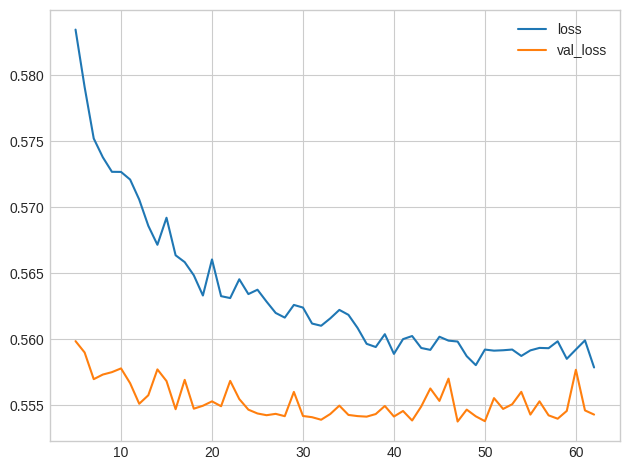

In [28]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

### In Lab: *Binary Classification*

Use a neural network to **classify cargo incidents** in the incident handling dataset.

1.   Define Model
2.   Add Optimizer, Loss Function and Evaluation Metric
3.   Train and Evaluate

